In [3]:
print("hello world")

hello world


In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys

In [5]:
assert hasattr(tf, "function")

In [31]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(images, targets), (_,_) = fashion_mnist.load_data()
images = (images - np.mean(images)) / np.std(images)
images = images[:10000]
targets = targets[:10000]

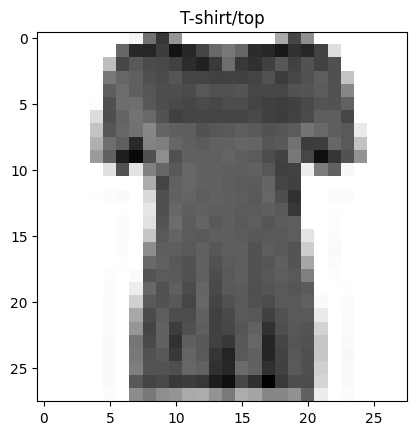

In [32]:
targets_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]
plt.imshow(images[10], cmap="binary")
plt.title(targets_names[targets[10]])
plt.show()

In [33]:
print("First line of one image", images[11][0])
print("Associated target", targets[11])

First line of one image [-0.81025766 -0.81025766 -0.81025766 -0.81025766 -0.81025766 -0.81025766
 -0.81025766 -0.81025766 -0.81025766 -0.81025766 -0.81025766 -0.81025766
 -0.81025766 -0.81025766 -0.37702629  0.42278547  0.22283253  0.13396456
 -0.51032825 -0.81025766 -0.81025766 -0.81025766 -0.81025766 -0.81025766
 -0.79914916 -0.81025766 -0.81025766 -0.81025766]
Associated target 9


In [34]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))

print("Shape of the image", images[0:1].shape)
model_output = model.predict(images[0:1])
print("Shape of the image after the Flattern", model_output.shape)

Shape of the image (1, 28, 28)
1/1 [==============================] - 0s 66ms/step
Shape of the image after the Flattern (1, 784)


In [35]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28,28]))

model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model_output = model.predict(images[0:1])
print(model_output, targets[0:1])

1/1 [==============================] - 0s 83ms/step
[[0.09243034 0.01620198 0.0282903  0.06316641 0.13778272 0.03758195
  0.35562629 0.12339685 0.13288246 0.01264078]] [9]


In [36]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 256)               200960    
                                                                 
 dense_19 (Dense)            (None, 128)               32896     
                                                                 
 dense_20 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

In [38]:
history = model.fit(images, targets, epochs=10)

Epoch 1/10
313/313 [==============================] - 2s 5ms/step - loss: 0.7879 - accuracy: 0.7339
Epoch 2/10
313/313 [==============================] - 2s 5ms/step - loss: 0.5215 - accuracy: 0.8154
Epoch 3/10
313/313 [==============================] - 1s 5ms/step - loss: 0.4600 - accuracy: 0.8365
Epoch 4/10
313/313 [==============================] - 1s 5ms/step - loss: 0.4229 - accuracy: 0.8473
Epoch 5/10
313/313 [==============================] - 2s 5ms/step - loss: 0.3919 - accuracy: 0.8613
Epoch 6/10
313/313 [==============================] - 2s 8ms/step - loss: 0.3728 - accuracy: 0.8656
Epoch 7/10
313/313 [==============================] - 2s 6ms/step - loss: 0.3544 - accuracy: 0.8726
Epoch 8/10
313/313 [==============================] - 1s 5ms/step - loss: 0.3368 - accuracy: 0.8802
Epoch 9/10
313/313 [==============================] - 1s 5ms/step - loss: 0.3235 - accuracy: 0.8834
Epoch 10/10
313/313 [==============================] - 1s 5ms/step - loss: 0.3060 - accuracy: 0.8904

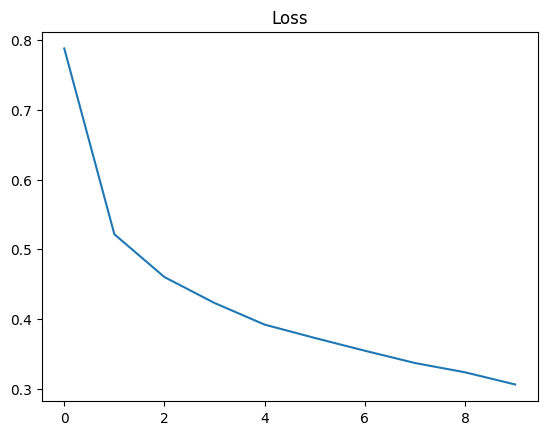

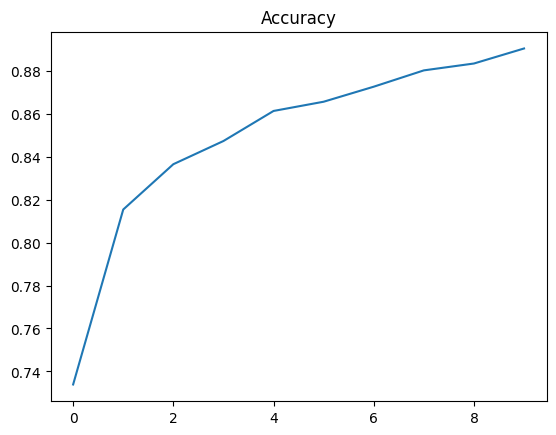

In [39]:
loss_curve = history.history['loss']
acc_curve = history.history['accuracy']


plt.subplots()
plt.plot(loss_curve)
plt.title("Loss")
plt.subplots()
plt.plot(acc_curve)
plt.title("Accuracy")
plt.show()